# 라이브러리

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import random

#from ggplot import *
#from scipy.stats import logistic
#from sklearn.metrics import roc_curve
#from sklearn.metrics import roc_auc_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix, mean_squared_error
#from sklearn.model_selection import train_test_split
#from sklearn import preprocessing
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import *
#from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
#import graphviz
#from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#from sklearn.svm import SVC, SVR

# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)


# 데이터 불러오기

In [3]:
import pandas as pd
DATA_PATH = './dataset/CARD/'
DATA_PATH_2 = './dataset/CUSTOMER/'
DATA_PATH_3 = './dataset/CC/'
cc_21_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_21_40(raw).csv', encoding="utf-8-sig")
cc_21_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_21_50(raw).csv', encoding="utf-8-sig")
cc_21_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_21_60(raw).csv', encoding="utf-8-sig")
cc_22_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_40(raw).csv', encoding="utf-8-sig")
cc_22_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_50(raw).csv', encoding="utf-8-sig")
cc_22_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_22_60(raw).csv', encoding="utf-8-sig")
cc_23_40_raw = pd.read_csv(DATA_PATH_3 + 'cc_23_40(raw).csv', encoding="utf-8-sig")
cc_23_50_raw = pd.read_csv(DATA_PATH_3 + 'cc_23_50(raw).csv', encoding="utf-8-sig")
cc_23_60_raw = pd.read_csv(DATA_PATH_3 + 'cc_23_60(raw).csv', encoding="utf-8-sig")
cc_22_40 = pd.read_csv(DATA_PATH_3 + 'cc_22_40.csv', encoding="utf-8-sig")
cc_22_50 = pd.read_csv(DATA_PATH_3 + 'cc_22_50.csv', encoding="utf-8-sig")
cc_22_60 = pd.read_csv(DATA_PATH_3 + 'cc_22_60.csv', encoding="utf-8-sig")

In [4]:
cc_23_40 = pd.read_csv(DATA_PATH_3 + 'cc_23_40.csv', encoding="utf-8-sig")
cc_23_50 = pd.read_csv(DATA_PATH_3 + 'cc_23_50.csv', encoding="utf-8-sig")
cc_23_60 = pd.read_csv(DATA_PATH_3 + 'cc_23_60.csv', encoding="utf-8-sig")
cc_21_40 = pd.read_csv(DATA_PATH_3 + 'cc_21_40.csv', encoding="utf-8-sig")
cc_21_50 = pd.read_csv(DATA_PATH_3 + 'cc_21_50.csv', encoding="utf-8-sig")
cc_21_60 = pd.read_csv(DATA_PATH_3 + 'cc_21_60.csv', encoding="utf-8-sig")

# 함수 모음

In [5]:
# 시간 
import time

def execution_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        hours, rem = divmod(elapsed_time, 3600)
        minutes, seconds = divmod(rem, 60)
        print(f"Execution time for {func.__name__}: {int(hours)}h {int(minutes)}m {seconds:.2f}s")
        return result
    return wrapper


# 용량 줄이기 과정
import pandas as pd 
import numpy as np

def reduce_mem_usage(df, float16_as32=True):
    # memory_usage()는 데이터프레임의 각 열의 메모리 사용량을 계산하고, sum은 그 값을 합산합니다. B -> KB -> MB로 변환합니다.
    start_mem = df.memory_usage().sum() / 1024**2
    print('데이터프레임의 초기 메모리 사용량은 {:.2f} MB입니다.'.format(start_mem))

    for col in df.columns:  # 각 열의 이름을 반복합니다.
        col_type = df[col].dtype  # 열의 데이터 타입을 가져옵니다.
        if col_type != object and str(col_type) != 'category':  # 객체 타입이 아닌 수치형 변수만 처리합니다.
            c_min, c_max = df[col].min(), df[col].max()  # 해당 열의 최소값과 최대값을 계산합니다.
            if str(col_type)[:3] == 'int':  # 정수형 변수일 경우 (int8, int16, int32, int64 모두 포함)
                # 이 열의 값 범위가 int8의 범위에 있을 경우 타입을 int8로 변환합니다. (-128부터 127까지)
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                # 이 열의 값 범위가 int16의 범위에 있을 경우 타입을 int16으로 변환합니다. (-32,768부터 32,767까지)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                # 이 열의 값 범위가 int32의 범위에 있을 경우 타입을 int32로 변환합니다. (-2,147,483,648부터 2,147,483,647까지)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                # 이 열의 값 범위가 int64의 범위에 있을 경우 타입을 int64로 변환합니다. (-9,223,372,036,854,775,808부터 9,223,372,036,854,775,807까지)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:  # 실수형일 경우
                # 값이 float16의 범위에 있을 경우 타입을 변환합니다. 더 높은 정밀도가 필요하면 float32를 고려합니다.
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    if float16_as32:  # 더 높은 정밀도가 필요하면 float32를 선택할 수 있습니다.
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float16)
                # 값이 float32의 범위에 있을 경우 타입을 float32로 변환합니다.
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                # 값이 float64의 범위에 있을 경우 타입을 float64로 변환합니다.
                else:
                    df[col] = df[col].astype(np.float64)
    # 최종 메모리 사용량을 계산합니다.
    end_mem = df.memory_usage().sum() / 1024**2
    print('최적화 후 데이터프레임의 메모리 사용량은: {:.2f} MB입니다.'.format(end_mem))
    # 초기 메모리 사용량과 비교하여 몇 퍼센트 감소했는지 계산합니다.
    print('메모리 사용량이 {:.1f}% 감소했습니다.'.format(100 * (start_mem - end_mem) / start_mem))

    return df


# 용량 줄이기 이것만 돌리면 됨
@execution_time
def clean_df(data):
    data['고객ID'] = data['고객ID'].astype(str)
    data = reduce_mem_usage(data)
    print(data.info())
    return data


# 고객 연령대별 추출
def customer_generation(df, feature): # feature에 뽑고 싶은 연령대를 입력한다. "연령대"
    df = df[df['연령대'].isin([f'{feature}'])]
    print(f'{feature}만 추출한 데이터프레임입니다.')
    print(df.head())
    return df



# 고객연령대 나눈 데이터프레임에서, ID 중복없이 추출 
def customer_gen_id(df, feature=None, show_age=False):  # show_age 매개변수 추가
    df_filtered = df[df['연령대'].isin([f'{feature}'])]
    selected_df = df_filtered.loc[:, ['고객ID', '연령대']]
    
    if show_age:  # show_age가 True일 때 고객ID와 연령대 포함
        df_edit = selected_df.drop_duplicates(subset=['고객ID', '연령대'])
    else:  # show_age가 False일 때 고객ID만 포함
        df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    
    print(df_edit.head())
    return df_edit


# 가맹업종명 재분류
@execution_time
def rename_category_store(df):
    mapping = {
        '교육/학원': ['보습학원', '예·체능계학원', '외국어학원', '기타 교육기관', '기능학원', '학원', '학습지교육', '초중고교육기관'],
        '미용': ['미용원', '피부미용실'],
        '스포츠/레저': ['기타레져업소', '스포츠·레져용품', '스포츠의류', '스크린골프', '헬스클럽', '골프경기장', '종합레져타운', '골프용품 전문점', '골프연습장', '안마/스포츠마사지', '레져업소', '수 영 장'],
        '여행/교통': ['기타숙박업', '철도', '특급호텔', '1급 호텔', '렌터카', '항공사', '콘도', '2급 호텔', '관광여행', '여객선', '고속버스', '택시'],
        '외식': ['일반한식', '주점', '서양음식', '중국식', '일식·회집', '한정식', '칵테일바', '갈비전문점'],
        '대형마트': ['슈퍼마켓', '농협하나로클럽', '농,축협직영매장', '대형할인점'],
        '백화점': ['면 세 점', '자사카드발행백화점'],
        '편의점': ['편 의 점'],
        '음식료품': ['정육점', '스넥', '농·축·수산품', '농축수산가공품', '주류판매점', '홍삼제품', '인삼제품', '기타건강식품'],
        '카페/베이커리': ['기타음료식품', '제과점'],
        '의료/보험': ['약 국', '의 원', '한 의 원', '치과의원', '기타의료기관 및 기타의료기기', '한약방', '한방병원', '생명보험', '건강진단', '기타보험', '병 원(응급실운영)', '치과병원', '동물병원', '종합병원', '손해보험'],
        '주유': ['SK주유소', '쌍용S-OIL', 'GS주유소', '주유소', 'SK가스충전소', '현대정유(오일뱅크)', 'GS가스충전소', '쌍용S-OIL가스충전소', '현대정유가스충전소', 'E1가스충전소', '전기차충전소'],
        '문화생활': ['문화취미기타', '영화관', '티켓'],
        '이동통신요금': ['이동통신요금'],
        '반려동물': ['애완동물'],
        '간편결제': ['인터넷P/G'],
        '기타': ['전자상거래상품권전문판매', '캐주얼의류', 'CATV', '택시회사', '위성방송', '음반영상물', '제 화','주방용구', '연 쇄 점', '액세서리', '전문서적', '주차장', '민예·공예품', '건축용 요업제품', '단란주점', '옷감·직물', '자동차시트·타이어', '독서실', '농기계', '조명기구', '세차장', '사무서비스', '컴퓨터', '가 방', '보일러·펌프·샷시', '카페트,커튼,천막,지물', '자동차부품', '자동차정비', '기타유통업', '이륜차판매', '카인테리어', '화물운송', '내의판매', '목재·석재·철물', '기타 사무용품', '기타가구', '신 발', '비영리/비대상', '기타대인서비스', '기타전기제품', 'DP&E', '주방용식기', '가타자동차서비스', '기타농업관련', '구내매점(국가기관등)', '아동의류', '이용원', '조세서비스', '기념품점', '유흥주점', '통신기기', '화원', '화장품', '기타잡화', '유아원', 'LPG취급점', '페인트', '출판 및 인쇄물', '귀금속', '문구용품', '위탁급식업', '비료,사료,종자', '침구·수예점', '당구장', '가전제품', '인터넷Mall', '가정용품수리', '사무·통신기기수리', '안경', '세탁소', '사우나', '일반서적', '노 래 방', '기계공구',  '완구점', '기타의류', '미곡상', '기타용역서비스', '기타수리서비스', '기타건축자재', '일반가구', '사무용 OA기기', '인테리어전문', '가례서비스업', '시 계', '비영리/대상', '윤활유전문판매', '정수기', '공공요금대행서비스/소득공제비대상', '화방·표구점', '볼 링 장', '인터넷종합Mall', '기타 전문점', '통신판매업1', '종합용역', '전자상거래상품권', '보관및 창고업', '유류판매', '업종미등록', '통신서비스/소득공제비대상', '기타서적문구', '수족관', '공공요금대행서비스/소득공제대상', '상품권전문판매', '혼례서비스업', '냉열기기', '비씨카드 정산용(할인)', '일반(통신판매)', '기타4', '기타1', '부동산중개·임대', 'CATV홈쇼핑', '소프트웨어', '의료용품', '정장', '맞춤복점', '단체복', '상 품 권', 'PG상품권', '비씨카드 정산용가맹점',  '미용재료']
    }
    for category, values in mapping.items():
        df['가맹점업종명'] = df['가맹점업종명'].replace(values, category)
    print(df['가맹점업종명'].unique())
    return df


# 지역 재분류
def rename_category_region(df):
    region_groups = {
        '서울특별시': '수도권', '경기도': '수도권', '인천광역시': '수도권',
        '부산광역시': '영남권', '울산광역시': '영남권', '경상남도': '영남권',
        '충청북도': '충청권', '충청남도': '충청권', '대전광역시': '충청권', '세종특별자치시': '충청권',
        '전북특별자치도': '호남권', '전라남도': '호남권', '광주광역시': '호남권',
        '강원특별자치도': '강원·제주권', '제주특별자치도': '강원·제주권'
    }

    df['가맹점_광역시도'] = df['가맹점_광역시도'].replace(region_groups)
    # 원본 데이터 변경할 거면 card_2021['가맹점_광역시도'].replace(region_groups, inplace=True)
    df['가맹점_광역시도'].value_counts()
    return df



# join 쉽게하기
def join(df1, df2, key, way): # merge할 두 데이터를 df1, df2에 쓴다. key에 join 할 컬럼 이름 쓴다. way에는 조인 방식 쓴다.
    df_joined= pd.merge(df1, df2, on=f'{key}', how=f'{way}')
    print(type(df_joined))
    print(df_joined.head(3))
    #card_customer_22_40_id.to_csv('cc_22_40.csv', index=False, encoding='utf-8-sig')
    return df_joined


# 연령대와 다른 원하는 컬럼들만 뽑아 dataframe으로 만드는 함수
def slicing(df, generation=None, feature=None):  
    # generation과 feature가 단일 값일 경우 리스트로 변환
    if isinstance(generation, str):  
        generation = [generation]
    if isinstance(feature, str):  
        feature = [feature]
        
    df_filtered = df[df['연령대'].isin(generation)]
    sliced_df = df_filtered.loc[:, feature + ['연령대']]  # feature 리스트와 '연령대' 추가

#    df_edited = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    
    print(type(sliced_df))
    print(sliced_df.head())
    return sliced_df





# 세대 - 가맹업종별 승인금액 bar plot
def amount_generation(df, year ,generation=None, top=None, bottom=None, columns=None):
    fig, ax = plt.subplots(figsize=(10, 6))
    total_amounts = df.groupby('가맹점업종명')['승인금액'].sum().reset_index()
    total_amounts_sort = total_amounts.sort_values(by='승인금액', ascending=False)
    if top is not None:
        total_amounts_sort = total_amounts_sort.head(top)
    elif bottom is not None:
        total_amounts_sort = total_amounts_sort.tail(bottom)
    if columns is not None:
        total_amounts_sort = total_amounts_sort[total_amounts_sort['가맹점업종명'].isin(columns)]
    ax = sns.barplot(x='가맹점업종명', y='승인금액', data=total_amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} 업종별 승인금액 합계")
    ax.set_xlabel("업종")
    ax.set_ylabel("승인금액 합계")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 1e7:.2f}억',  # 조 단위로 변환 후 소수점 2자리까지 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=8
        )
    ax.text(1, 1.02, "(단위: 억 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
plt.show()



# count barplot
def barplot_counts(df, feature, year, generation):  # 카드 거래량 barplot
    fig, ax = plt.subplots(figsize=(10, 6))
    card_counts = df[feature].value_counts()
    ax = sns.barplot(x=card_counts.index, y=card_counts.values / 1e6, palette="viridis")
    ax.set_title(f"{year}년도 {generation} 카드거래량")
    ax.set_xlabel(f"{feature}")
    ax.set_ylabel("거래량 (백만건)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.text(1, 1.02, "(단위: 백만건)", ha='right', va='center', transform=plt.gca().transAxes, fontsize=10, color="black")
    
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,    # x 위치 (막대 중앙)
            p.get_height() + 0.1,             # y 위치를 더 높게 조정 (막대 위 약간 위로)
            f'{p.get_height():.2f}백만건',    # 백만 단위로 변환된 값 표시
            ha='center',                      # 텍스트 가로 정렬 (중앙 정렬)
            fontsize=8                       # 폰트 크기를 10으로 조정
        )

    ax.get_yaxis().get_major_formatter().set_scientific(False)
    plt.show()


# 합계 barplot
def barplot_sum(df, feature1, feature2, year ,generation):
    fig, ax = plt.subplots(figsize=(10, 6))
    total_amounts = df.groupby([feature1])[feature2].sum().reset_index()
    total_amounts_sort = total_amounts.sort_values(by=feature2, ascending=False)
    ax = sns.barplot(x=f'{feature1}', y=f'{feature2}', data=total_amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} {feature1}별 {feature2} 합계")
    ax.set_xlabel(f"{feature1}")
    ax.set_ylabel(f"{feature2} 합계")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 1e12:.2f}조',  # 조 단위로 변환 후 소수점 2자리까지 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=8
        )
    ax.text(1, 1.02, "(단위: 조 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
    ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


# 평균 승인금액 그래프 함수
def barplot_avg(df, feature1, feature2, year, generation):
    amounts = df.groupby([feature1])[feature2].sum().reset_index()
    counts = df[feature1].value_counts()
    amounts['카드거래량'] = amounts[feature1].map(counts).astype(float)  # 숫자형으로 변환
    amounts['평균 승인금액'] = amounts[feature2] / amounts['카드거래량']  # 평균 승인금액 계산
    amounts_sort = amounts.sort_values(by='평균 승인금액', ascending=False)
    amounts_sort['평균 승인금액_만단위'] = amounts_sort['평균 승인금액']

    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.barplot(x=f'{feature1}', y='평균 승인금액', data=amounts_sort, palette="viridis")
    ax.set_title(f"{year}년도 {generation} {feature1}별 평균{feature2}")
    ax.set_xlabel(f"{feature1}")
    ax.set_ylabel("평균 승인금액 (단위: 만 원)")
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    ticks = ax.get_yticks()  # 현재 Y축 눈금 가져오기
    ax.set_yticklabels([int(tick / 10000) for tick in ticks])  # 만 단위로 변환하여 설정
    
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # x 위치 (막대 중앙)
            p.get_height() + 0.5,           # y 위치 (막대 위)
            f'{p.get_height() / 10000:.2f}만원',  # 만 단위로 표시
            ha='center',                    # 텍스트 가운데 정렬
            fontsize=6
        )

    ax.text(1, 1.02, "(단위: 만 원)", ha='right', va='center', transform=ax.transAxes, fontsize=10, color="black")
    
    plt.show()

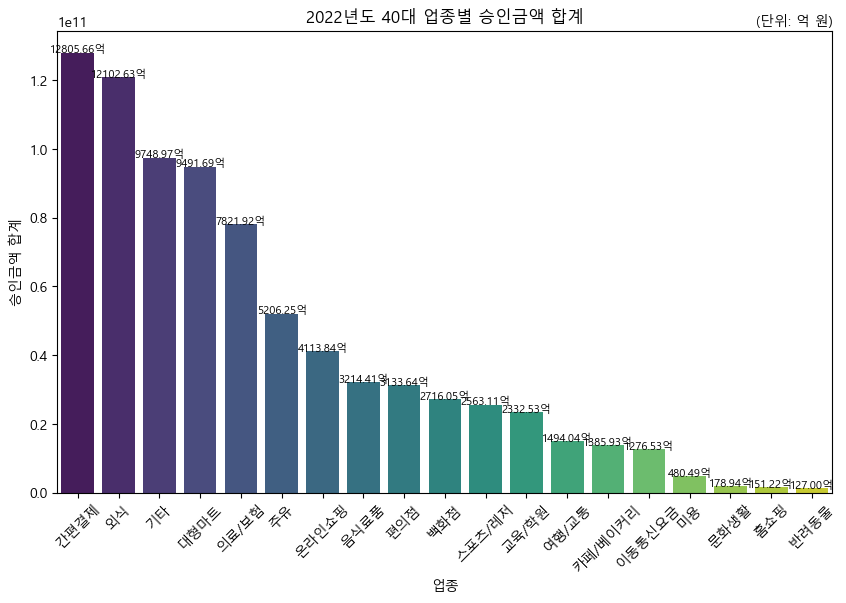

In [6]:
amount_generation(cc_22_40, "2022", "40대")

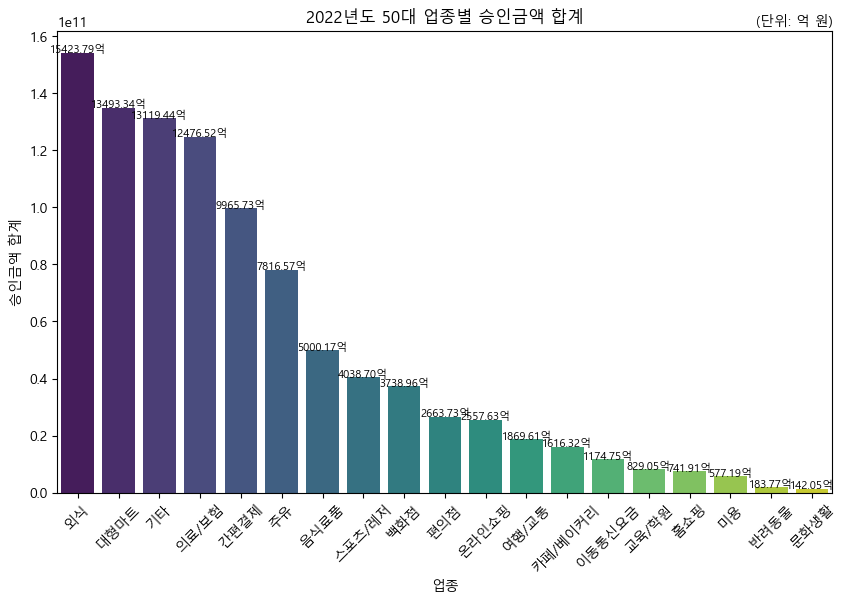

In [7]:
amount_generation(cc_22_50, "2022", "50대")

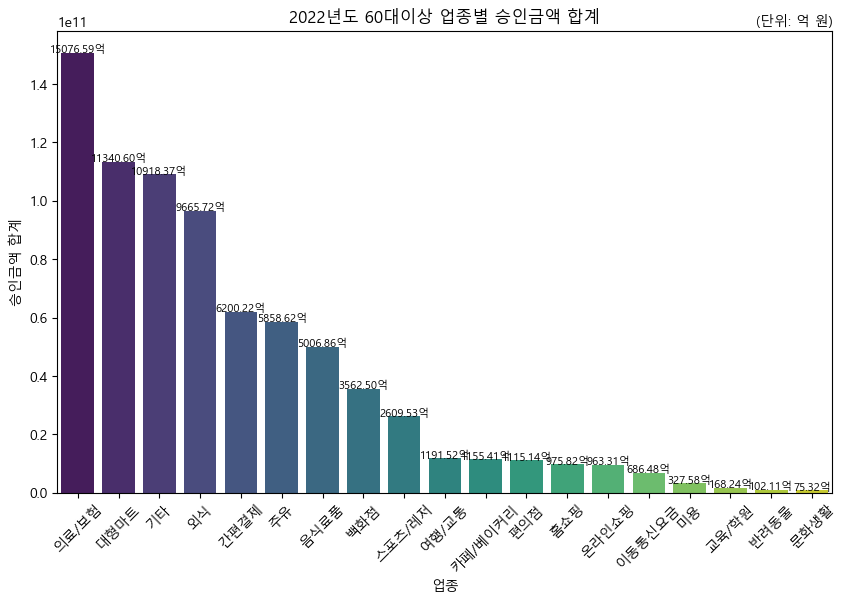

In [8]:
amount_generation(cc_22_60, "2022", "60대이상")

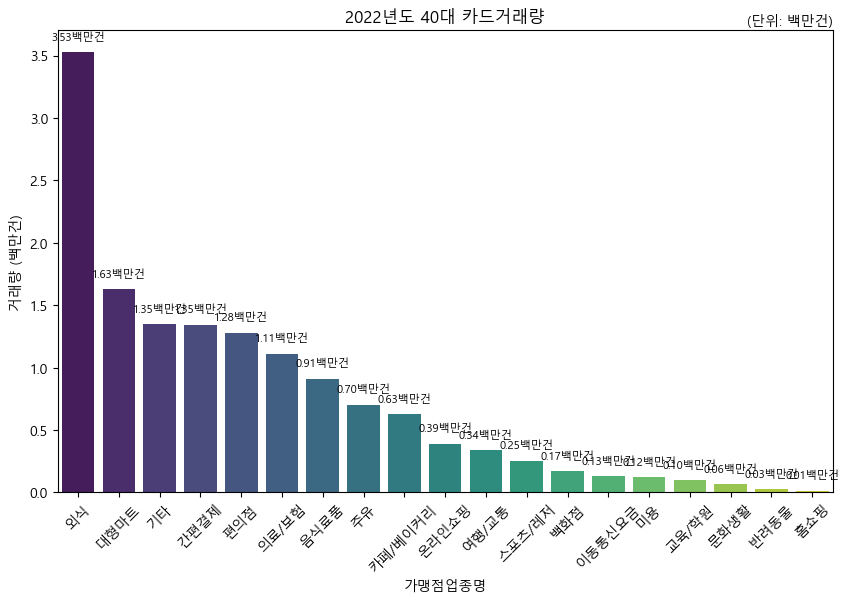

In [9]:
barplot_counts(cc_22_40, "가맹점업종명", "2022", "40대")

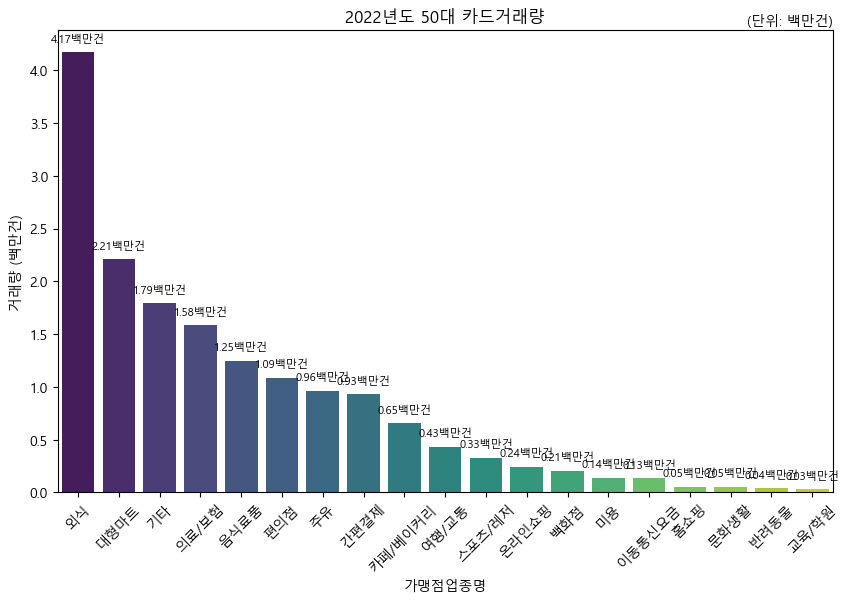

In [11]:
barplot_counts(cc_22_50, "가맹점업종명", "2022", "50대")

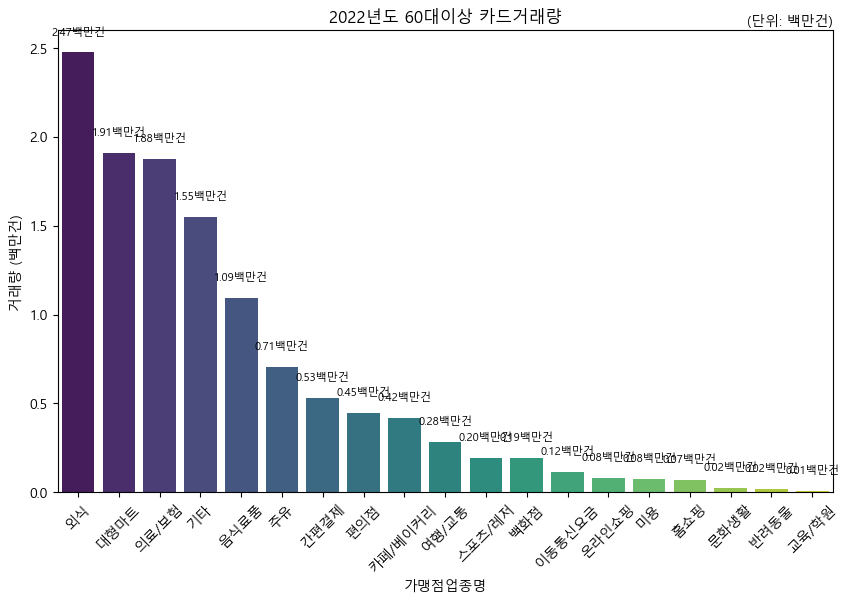

In [10]:
barplot_counts(cc_22_60, "가맹점업종명", "2022", "60대이상")

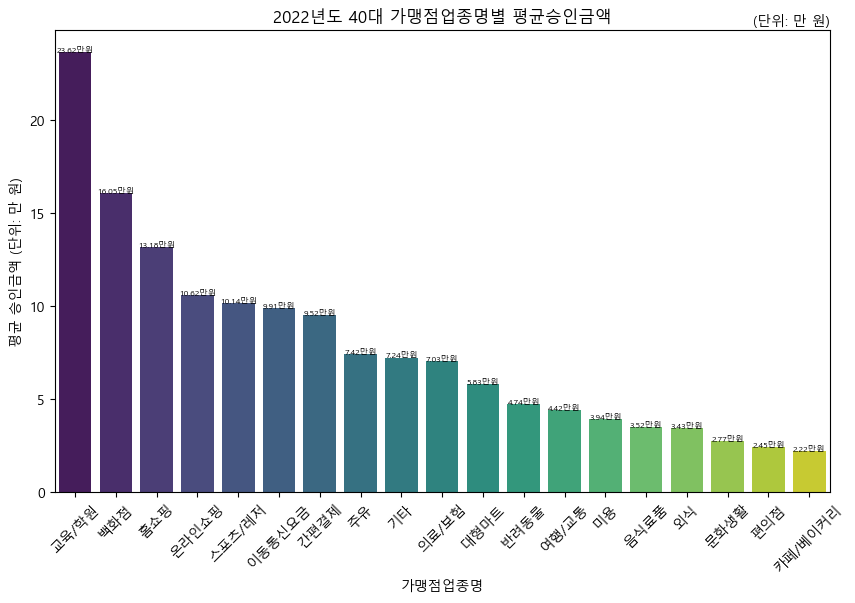

In [11]:
barplot_avg(cc_22_40, "가맹점업종명", "승인금액", "2022", "40대")

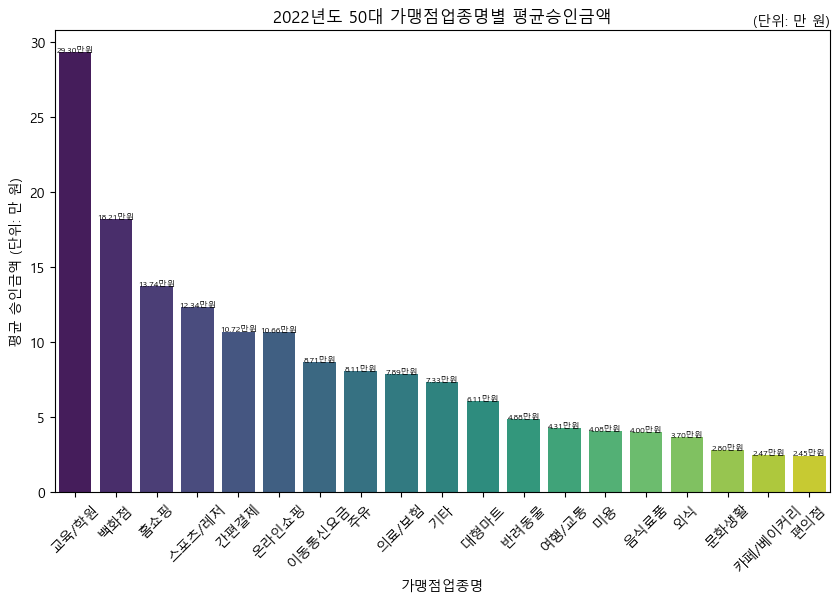

In [12]:
barplot_avg(cc_22_50, "가맹점업종명", "승인금액", "2022", "50대")

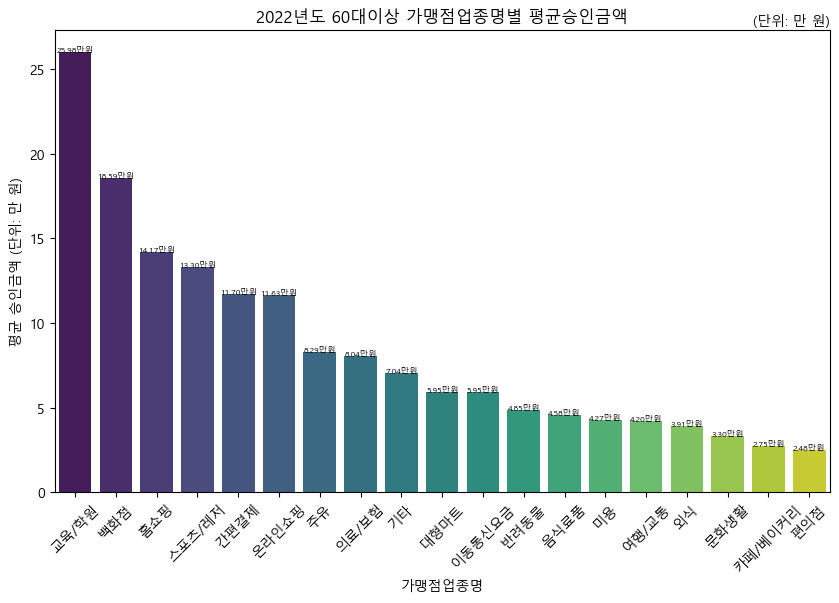

In [13]:
barplot_avg(cc_22_60, "가맹점업종명", "승인금액", "2022", "60대이상")

In [14]:
cc_23_40.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9997288918,202312,기타,서울특별시,중구,5번이하,10000
1,9997288918,202312,대형마트,경상북도,경산시,5번이하,30000
2,9997288918,202312,음식료품,경상남도,김해시,5번이하,30000
3,9997288918,202312,편의점,경상북도,김천시,5번이하,30000
4,9997288918,202312,외식,경상북도,김천시,5번이하,20000


In [15]:
cc_22_40[cc_22_40['가맹점업종명'] == '외식']

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
1,9997364303,202212,외식,경상북도,영천시,5번이하,120000
4,9997364303,202212,외식,경상북도,영천시,5번이하,30000
16,9997364303,202209,외식,경상북도,경산시,5번이하,10000
19,9997364303,202209,외식,경상북도,영천시,5번이하,40000
20,9997364303,202209,외식,부산광역시,기장군,5번이하,40000
...,...,...,...,...,...,...,...
14076721,2793817027,202209,외식,부산광역시,기장군,5번이하,10000
14076723,2793817027,202209,외식,부산광역시,동래구,5번이하,10000
14076728,2793817027,202207,외식,부산광역시,동래구,5번이하,10000
14076729,2793817027,202207,외식,부산광역시,해운대구,5번이하,10000


In [20]:
import scipy.stats as stats

# 각 그룹 데이터를 숫자형만 남기고 결측치(NaN) 제거
group_a = cc_22_60[cc_22_60['가맹점업종명'] == '외식']['승인금액'].dropna().astype(float)
group_b = cc_22_60[cc_22_60['가맹점업종명'] == '음식료품']['승인금액'].dropna().astype(float)
group_c = cc_22_60[cc_22_60['가맹점업종명'] == '기타']['승인금액'].dropna().astype(float)

# 일원 분산분석 수행
f_stat, p_val = stats.f_oneway(group_a, group_b, group_c)

print("F-statistic:", f_stat)
print("p-value:", p_val)

# 결과 해석
if p_val < 0.05:
    print("p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.")
else:
    print("p-value가 0.05보다 크므로, 그룹 간 평균 차이가 유의미하지 않다고 할 수 있습니다.")


F-statistic: 25902.5800006762
p-value: 0.0
p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.


In [21]:
import scipy.stats as stats

# 각 그룹 데이터를 숫자형만 남기고 결측치(NaN) 제거
group_a = cc_22_40[cc_22_40['가맹점업종명'] == '외식']['승인금액'].dropna().astype(float)
group_b = cc_22_50[cc_22_50['가맹점업종명'] == '외식']['승인금액'].dropna().astype(float)
group_c = cc_22_60[cc_22_60['가맹점업종명'] == '외식']['승인금액'].dropna().astype(float)

# 일원 분산분석 수행
f_stat, p_val = stats.f_oneway(group_a, group_b, group_c)

print("F-statistic:", f_stat)
print("p-value:", p_val)

# 결과 해석
if p_val < 0.05:
    print("p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.")
else:
    print("p-value가 0.05보다 크므로, 그룹 간 평균 차이가 유의미하지 않다고 할 수 있습니다.")


F-statistic: 5772.413795048192
p-value: 0.0
p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.


In [17]:
import scipy.stats as stats

# 각 그룹 데이터를 숫자형만 남기고 결측치(NaN) 제거
group_a = cc_22_40[cc_22_40['가맹점업종명']['승인금액']].dropna().astype(float)
group_b = cc_22_50[cc_22_50['가맹점업종명']['승인금액']].dropna().astype(float)
group_c = cc_22_60[cc_22_60['가맹점업종명']['승인금액']].dropna().astype(float)

# 일원 분산분석 수행
f_stat, p_val = stats.f_oneway(group_a, group_b, group_c)

print("F-statistic:", f_stat)
print("p-value:", p_val)

# 결과 해석
if p_val < 0.05:
    print("p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.")
else:
    print("p-value가 0.05보다 크므로, 그룹 간 평균 차이가 유의미하지 않다고 할 수 있습니다.")


KeyError: '승인금액'

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1  group2  meandiff p-adj   lower     upper   reject
----------------------------------------------------------
Group A Group B 2678.4113   0.0 2586.2032 2770.6194   True
Group A Group C 4754.8917   0.0 4649.1929 4860.5906   True
Group B Group C 2076.4804   0.0 1974.1945 2178.7663   True
----------------------------------------------------------


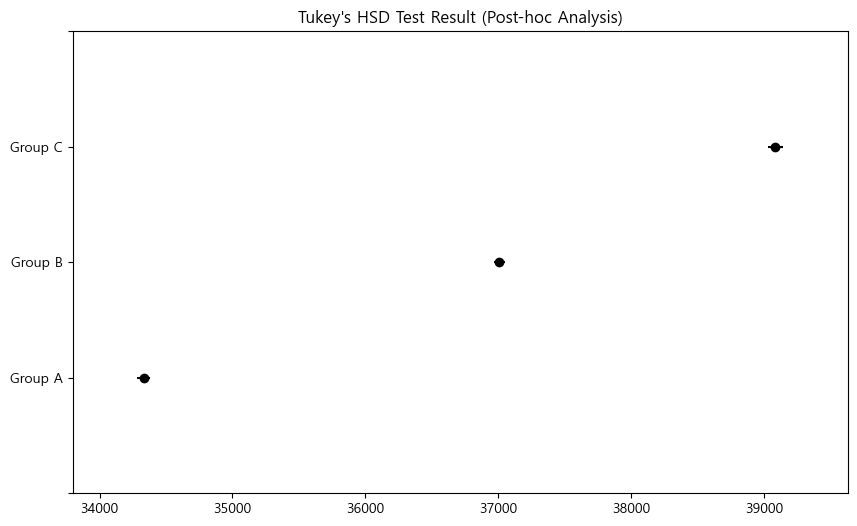

In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 데이터 합치기
data = pd.DataFrame({
    'value': group_a.tolist() + group_b.tolist() + group_c.tolist(),
    'group': ['Group A'] * len(group_a) + ['Group B'] * len(group_b) + ['Group C'] * len(group_c)
})

# Tukey's HSD 사후검정
tukey_result = pairwise_tukeyhsd(data['value'], data['group'])

# 결과 출력
print(tukey_result)

# Tukey's HSD 시각화
tukey_result.plot_simultaneous()
plt.title("Tukey's HSD Test Result (Post-hoc Analysis)")
plt.show()

In [24]:
import scipy.stats as stats

# 각 그룹 데이터를 숫자형만 남기고 결측치(NaN) 제거
group_a = cc_22_40[cc_22_40['가맹점업종명'] == '간편결제']['승인금액'].dropna().astype(float)
group_b = cc_22_50[cc_22_50['가맹점업종명'] == '간편결제']['승인금액'].dropna().astype(float)
group_c = cc_22_60[cc_22_60['가맹점업종명'] == '간편결제']['승인금액'].dropna().astype(float)

# 일원 분산분석 수행
f_stat, p_val = stats.f_oneway(group_a, group_b, group_c)

print("F-statistic:", f_stat)
print("p-value:", p_val)

# 결과 해석
if p_val < 0.05:
    print("p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.")
else:
    print("p-value가 0.05보다 크므로, 그룹 간 평균 차이가 유의미하지 않다고 할 수 있습니다.")


F-statistic: 1912.8065187745783
p-value: 0.0
p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.


In [25]:
import scipy.stats as stats

# 각 그룹 데이터를 숫자형만 남기고 결측치(NaN) 제거
group_a = cc_22_40_raw[cc_22_40_raw['가맹점업종명'] == '면 세 점']['승인금액'].dropna().astype(float)
group_b = cc_22_50_raw[cc_22_50_raw['가맹점업종명'] == '면 세 점']['승인금액'].dropna().astype(float)
group_c = cc_22_60_raw[cc_22_60_raw['가맹점업종명'] == '면 세 점']['승인금액'].dropna().astype(float)

# 일원 분산분석 수행
f_stat, p_val = stats.f_oneway(group_a, group_b, group_c)

print("F-statistic:", f_stat)
print("p-value:", p_val)

# 결과 해석
if p_val < 0.05:
    print("p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.")
else:
    print("p-value가 0.05보다 크므로, 그룹 간 평균 차이가 유의미하지 않다고 할 수 있습니다.")


F-statistic: 4.620042631023382
p-value: 0.009861692137757706
p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.


In [26]:
def one_way_anova(df1, df2, df3, feature):
    import scipy.stats as stats

    # 각 그룹 데이터를 숫자형만 남기고 결측치(NaN) 제거
    group_a = df1[df1['가맹점업종명'] == f'{feature}']['승인금액'].dropna().astype(float)
    group_b = df2[df2['가맹점업종명'] == f'{feature}']['승인금액'].dropna().astype(float)
    group_c = df3[df3['가맹점업종명'] == f'{feature}']['승인금액'].dropna().astype(float)
    
    # 일원 분산분석 수행
    f_stat, p_val = stats.f_oneway(group_a, group_b, group_c)
    
    print("F-statistic:", f_stat)
    print("p-value:", p_val)
    
    # 결과 해석
    if p_val < 0.05:
        print("p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.")
    else:
        print("p-value가 0.05보다 크므로, 그룹 간 평균 차이가 유의미하지 않다고 할 수 있습니다.")
    return 


In [27]:
one_way_anova(cc_21_40, cc_21_50, cc_21_60, "간편결제")

F-statistic: 1993.6830989715172
p-value: 0.0
p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.


In [28]:
one_way_anova(cc_22_40, cc_22_50, cc_22_60, "간편결제")

F-statistic: 1912.8065187745783
p-value: 0.0
p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.


In [29]:
one_way_anova(cc_23_40, cc_23_50, cc_23_60, "간편결제")

F-statistic: 2041.7065494692179
p-value: 0.0
p-value가 0.05보다 작으므로, 그룹 간 평균 차이가 유의미하다고 할 수 있습니다.


In [30]:
cc_21_40_raw.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9997473165,202109,대형할인점,경상북도,성주군,5번이하,20000
1,9997473165,202108,PG상품권,경기도,성남시 분당구,5번이하,30000
2,9997473165,202108,일반한식,경상북도,성주군,5번이하,10000
3,9997473165,202107,PG상품권,경기도,성남시 분당구,5번이하,10000
4,9997473165,202107,서양음식,경상북도,칠곡군,5번이하,20000


# 고객 수

In [32]:
def customer_gen_id(df, feature=None, show_age=False):  # show_age 매개변수 추가
    df_filtered = df[df['연령대'].isin([f'{feature}'])]
    selected_df = df_filtered.loc[:, ['고객ID', '연령대']]
    
    if show_age:  # show_age가 True일 때 고객ID와 연령대 포함
        df_edit = selected_df.drop_duplicates(subset=['고객ID', '연령대'])
    else:  # show_age가 False일 때 고객ID만 포함
        df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    
    print(df_edit.head())
    return df_edit

In [36]:
cc_22_40.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액
0,9997364303,202212,이동통신요금,서울특별시,중구,5번이하,70000
1,9997364303,202212,외식,경상북도,영천시,5번이하,120000
2,9997364303,202212,온라인쇼핑,경기도,성남시 분당구,5번이하,80000
3,9997364303,202212,의료/보험,경상북도,영천시,5번이하,10000
4,9997364303,202212,외식,경상북도,영천시,5번이하,30000


# 년도별 고객, 연령

In [ ]:
# 고객 연령대별 추출
def customer_generation(df, feature): # feature에 뽑고 싶은 연령대를 입력한다. "연령대"
    df = df[df['연령대'].isin([f'{feature}'])]
    print(f'{feature}만 추출한 데이터프레임입니다.')
    print(df.head())
    return df



# 고객연령대 나눈 데이터프레임에서, ID 중복없이 추출 
def customer_gen_id(df, feature=None, show_age=False):  # show_age 매개변수 추가
    df_filtered = df[df['연령대'].isin([f'{feature}'])]
    selected_df = df_filtered.loc[:, ['고객ID', '연령대']]
    
    if show_age:  # show_age가 True일 때 고객ID와 연령대 포함
        df_edit = selected_df.drop_duplicates(subset=['고객ID', '연령대'])
    else:  # show_age가 False일 때 고객ID만 포함
        df_edit = pd.DataFrame(selected_df['고객ID'].unique(), columns=['고객ID'])
    
    print(df_edit.head())
    return df_edit

In [49]:
#customer_22 = pd.read_csv(DATA_PATH_2 + 'customer_22.csv', encoding="euc-kr")

In [50]:
#customer_21 = pd.read_csv(DATA_PATH_2 + 'customer_21.csv', encoding="utf-8-sig")
#customer_23= pd.read_csv(DATA_PATH_2 + 'customer_23.csv', encoding="utf-8-sig")

# 거래년월에서 월만 분리

In [39]:
cc_22_40['월'] = cc_22_40['거래년월'].astype(str).str[-2:].astype(int)

In [40]:
cc_22_40.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,월
0,9997364303,202212,이동통신요금,서울특별시,중구,5번이하,70000,12
1,9997364303,202212,외식,경상북도,영천시,5번이하,120000,12
2,9997364303,202212,온라인쇼핑,경기도,성남시 분당구,5번이하,80000,12
3,9997364303,202212,의료/보험,경상북도,영천시,5번이하,10000,12
4,9997364303,202212,외식,경상북도,영천시,5번이하,30000,12


In [41]:
cc_22_50['월'] = cc_22_50['거래년월'].astype(str).str[-2:].astype(int)

In [42]:
cc_22_60['월'] = cc_22_60['거래년월'].astype(str).str[-2:].astype(int)

In [43]:
cc_22_50.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,월
0,9998496340,202212,외식,대구광역시,달성군,5번이하,10000,12
1,9998496340,202212,외식,대구광역시,달서구,5번이하,10000,12
2,9998496340,202212,외식,대구광역시,달성군,5번이하,10000,12
3,9998496340,202212,외식,경상북도,경산시,5번이하,40000,12
4,9998496340,202212,대형마트,대구광역시,중구,5번이하,10000,12


In [44]:
cc_22_60.head()

,고객ID,거래년월,가맹점업종명,가맹점_광역시도,가맹점_시군구,승인건수,승인금액,월
0,9999998161,202207,여행/교통,대구광역시,수성구,5번초과 10번이하,50000,7
1,9999998161,202207,여행/교통,대구광역시,수성구,5번이하,20000,7
2,9999998161,202206,여행/교통,대구광역시,수성구,5번초과 10번이하,50000,6
3,9999998161,202206,여행/교통,대구광역시,수성구,5번이하,10000,6
4,9999998161,202205,여행/교통,대구광역시,수성구,10번초과 15번이하,80000,5


In [1]:
cc_22_60_m = cc_22_60.drop(columns=['거래년월'])
cc_22_60_m.head()

NameError: name 'cc_22_60' is not defined